# Diagonalization of XZX model for systems of relative low size
This notebook checks if the ground state is degenerate for OBC and non-degenerate for PBC. It also calculates how the time scale with the size of the system for full matrix, sparse matrix and sparse block matrix.

In [2]:
import functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import block_diag
from numpy.linalg import eigh
from scipy.sparse.linalg import eigsh
import time

## Ground state degeneracy

In [3]:
L = 7

### PBC

#### Full Matrix

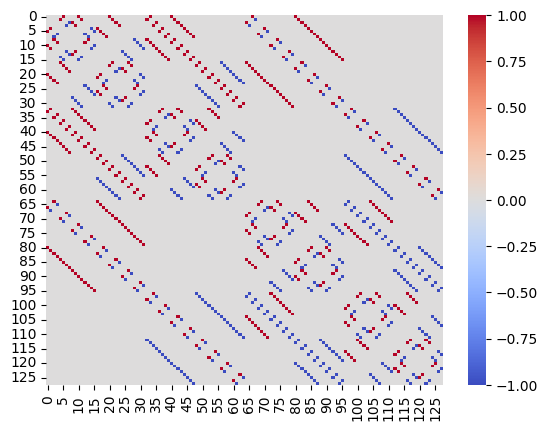

In [4]:
h = np.zeros((2**L,2**L))

for n in range(2**L): 
    output = functions.apply_H(n, L, pbc=True)
    for m in output:
        h[n,m[1]] += m[0]

sns.heatmap(h, cmap='coolwarm')#, linecolor='white', linewidth=0.2)
plt.show()

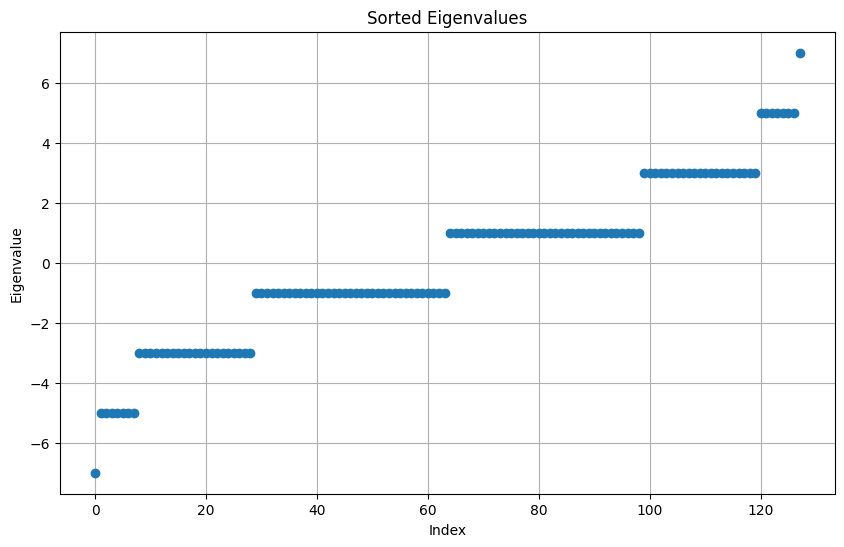

In [5]:
# Diagonalize the matrix h
eigenvalues, _ = eigh(h)


# Sort the eigenvalues from lowest to highest
sorted_eigenvalues = np.sort(eigenvalues)

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

#### Translational Simmetry

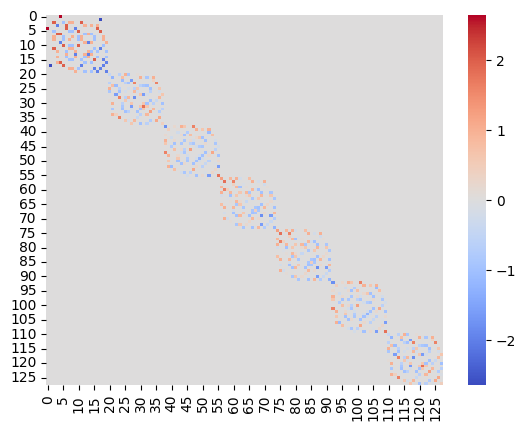

In [5]:
zero = functions.build_HK(L,0)
h = block_diag(zero,functions.build_HK(L,1))
for k in range(2,L):
    h=block_diag(h,functions.build_HK(L,k))

sns.heatmap(np.real(h), cmap='coolwarm')#, linecolor='white', linewidth=0.2)
plt.show()

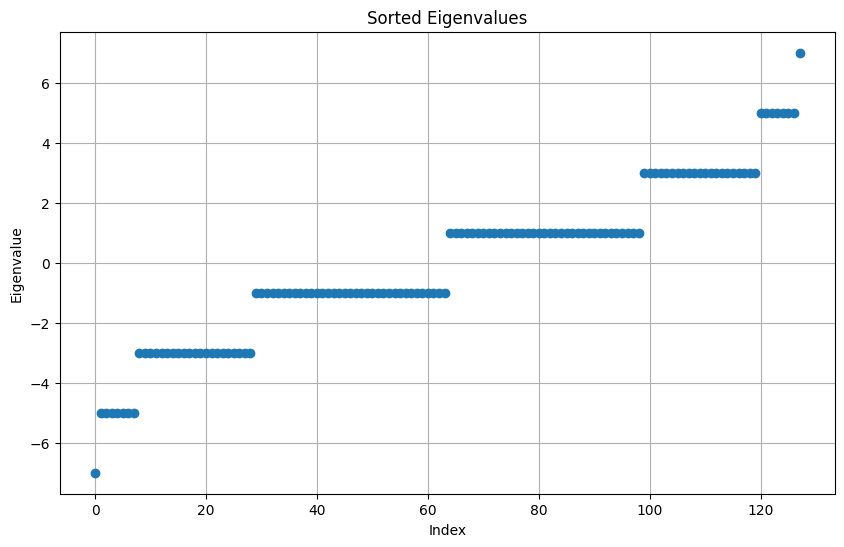

In [6]:
# Diagonalize the matrix h
eigenvalues, _ = eigh(h)


# Sort the eigenvalues from lowest to highest
sorted_eigenvalues = np.sort(eigenvalues)

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

#### Eigenvectors for different k subpaces

In [170]:
eigs_k = []

for k in range(L):
    h = functions.build_HK(L,k)
    eigenvalues, _ = eigh(h)
    eigs_k.append((eigenvalues))

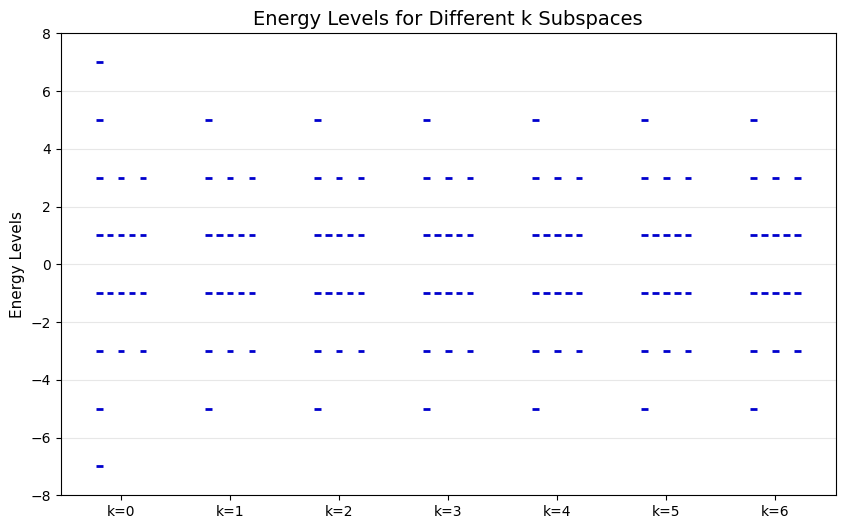

In [174]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for j, energies in enumerate(eigs_k):

    energy_levels, degeneracies = np.unique(np.round(energies, 8), return_counts=True)
    
    for i, (energy, degeneracy) in enumerate(zip(energy_levels, degeneracies)):
        x_positions = np.linspace(-0.2+j, 0.2+j, degeneracy)
        for x in x_positions:
            ax.hlines(energy, xmin=x-0.03, xmax=x+0.03, color='mediumblue', linewidth=2)

# Customizing the plot
ax.set_ylabel("Energy Levels", fontsize=11)
ax.set_xticks(np.arange(L),["k="+str(i) for i in range(L)])  
ax.set_ylim(-L-1, L + 1) 
ax.grid(alpha=0.3,axis='y')  

# Display the plot
plt.title("Energy Levels for Different k Subspaces", fontsize=14)
plt.show()


### OBC

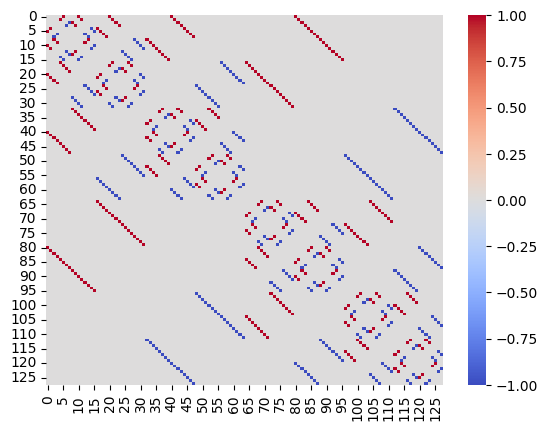

In [7]:
h = np.zeros((2**L,2**L))

for n in range(2**L):
    output = functions.apply_H(n, L, pbc=False)
    for m in output:
        h[n,m[1]] += m[0]

sns.heatmap(h, cmap='coolwarm')#, linecolor='white', linewidth=0.2)
plt.show()

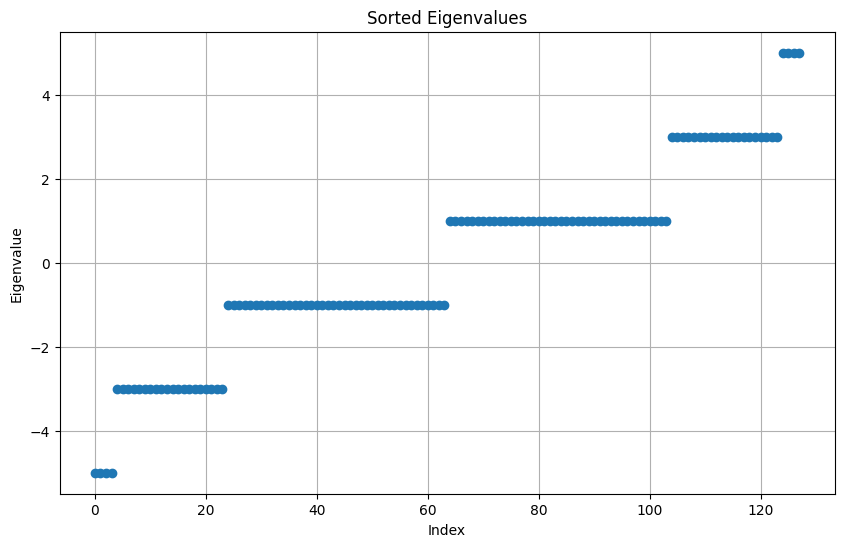

In [8]:
# Diagonalize the matrix h
eigenvalues, _ = eigh(h)


# Sort the eigenvalues from lowest to highest
sorted_eigenvalues = np.sort(eigenvalues)

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [26]:
sorted_eigenvalues[:4]

array([-4., -4., -4., -4.])

## Time scaling

### Full matrix

In [8]:
sizes = [3,4,5,6,7,8,9,10,11,12,13]

In [9]:
creation_times1 = []
diagonalization_times1 = []

for size in sizes[:9]:
    start_time = time.time()
    h = functions.build_fullH(size)
    creation_time = time.time() - start_time
    creation_times1.append(creation_time)
    
    start_time = time.time()
    eigenvalues, _ = eigh(h)
    diagonalization_time = time.time() - start_time
    diagonalization_times1.append(diagonalization_time)

In [10]:
creation_times2 = []
diagonalization_times2 = []

for size in sizes:
    start_time = time.time()
    h = functions.build_fullH(size,sparse=True)
    creation_time = time.time() - start_time
    creation_times2.append(creation_time)
    
    start_time = time.time()
    eigenvalues, _ = eigsh(h, k=int(size/2))
    diagonalization_time = time.time() - start_time
    diagonalization_times2.append(diagonalization_time)

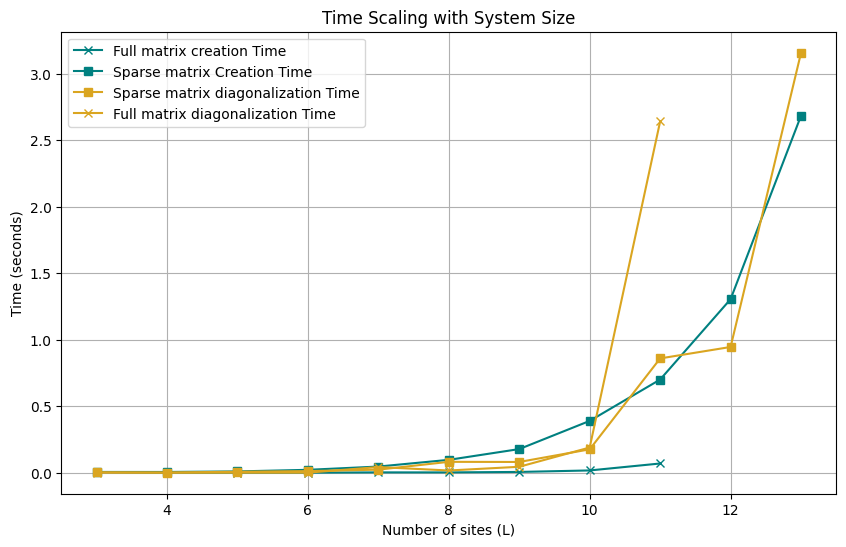

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(sizes[:9], creation_times1[:9], 'x-', label='Full matrix creation Time', color='teal')
plt.plot(sizes, creation_times2, 's-', label='Sparse matrix Creation Time',color='teal')
plt.plot(sizes, diagonalization_times2, 's-', label='Sparse matrix diagonalization Time',color='goldenrod')
plt.plot(sizes[:9], diagonalization_times1[:9], 'x-', label='Full matrix diagonalization Time', color='goldenrod')
plt.title('Time Scaling with System Size')
plt.xlabel('Number of sites (L)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()